In [1]:
# This https://github.com/stefanee88/Global-Suicide-Project/blob/master/suicide1.ipynb
# Follow along with this project


In [1]:
%matplotlib inline

In [2]:
!pip install datapackage
import datapackage

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from datapackage import Package
import scipy.stats as st
from scipy.stats import linregress, ttest_ind
from sklearn import datasets
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading in the data; the csv file
global_suicide_data = pd.read_csv("/Users/grantweaver/Desktop/Global-Suicide-Project-master/master.csv")


In [6]:
# See what the data looks like
global_suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Cleaning the Data


In [7]:
# Counting to see number values.
global_suicide_data.count()

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
country-year          27820
HDI for year           8364
 gdp_for_year ($)     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64

In [8]:
# Pulling the column names
global_suicide_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [9]:
# Renaming the columns
global_suicide_data = global_suicide_data.rename(columns={'country': 'Country', 'year': 'Year', 'sex': 'Gender', 'age': 'Age', 
                                                         'suicides_no':'SuicidesNo','population':'Population',
                                                'suicides/100k pop':'Suicides/100kPop','country-year':'Country/Year',
                                                'HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYear($)',
                                                'gdp_per_capita ($)':'GdpPerCapital($)','generation':'Generation'})

In [10]:
# This shows that the column names were correctly changed
global_suicide_data.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides/100kPop', 'Country/Year', 'HDIForYear', 'GdpForYear($)',
       'GdpPerCapital($)', 'Generation'],
      dtype='object')

In [11]:
# Checking for null values
global_suicide_data.isnull().any()

Country             False
Year                False
Gender              False
Age                 False
SuicidesNo          False
Population          False
Suicides/100kPop    False
Country/Year        False
HDIForYear           True
GdpForYear($)       False
GdpPerCapital($)    False
Generation          False
dtype: bool

In [12]:
#Count the amount of null values.
global_suicide_data.isnull().sum()

Country                 0
Year                    0
Gender                  0
Age                     0
SuicidesNo              0
Population              0
Suicides/100kPop        0
Country/Year            0
HDIForYear          19456
GdpForYear($)           0
GdpPerCapital($)        0
Generation              0
dtype: int64

In [13]:
#Dropping HDIForYear since there are thousands of null values.
global_suicide_data.drop('HDIForYear', axis=1, inplace = True)

In [14]:
#Dropping Country/Year since country and year exist as 2 separate columns.
global_suicide_data.drop('Country/Year', axis=1, inplace=True)

In [15]:
# This shows that the column names were effectively deleted
global_suicide_data.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides/100kPop', 'GdpForYear($)', 'GdpPerCapital($)', 'Generation'],
      dtype='object')

In [20]:
#Looking at number of values for each year
year_count1 = global_suicide_data['Year'].sort_values(ascending = True).value_counts().sort_index()
year_count1

1985     576
1986     576
1987     648
1988     588
1989     624
1990     768
1991     768
1992     780
1993     780
1994     816
1995     936
1996     924
1997     924
1998     948
1999     996
2000    1032
2001    1056
2002    1032
2003    1032
2004    1008
2005    1008
2006    1020
2007    1032
2008    1020
2009    1068
2010    1056
2011    1032
2012     972
2013     960
2014     936
2015     744
2016     160
Name: Year, dtype: int64

In [16]:
#Keeping 1990-2015 based on value counts.
global_suicide_data = global_suicide_data.loc[(global_suicide_data.Year >= 1990) & (global_suicide_data.Year < 2016)] 
global_suicide_data

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation
36,Albania,1992,male,35-54 years,12,343800,3.49,"709,452,584",251,Boomers
37,Albania,1992,male,15-24 years,9,263700,3.41,"709,452,584",251,Generation X
38,Albania,1992,male,55-74 years,5,159500,3.13,"709,452,584",251,Silent
39,Albania,1992,male,25-34 years,7,245500,2.85,"709,452,584",251,Boomers
40,Albania,1992,female,15-24 years,7,292400,2.39,"709,452,584",251,Generation X
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [17]:
#Double checking year value counts again to make sure the above cell worked correctly.
year_count2 = global_suicide_data['Year'].sort_values(ascending = True).value_counts().sort_index()
year_count2

1990     768
1991     768
1992     780
1993     780
1994     816
1995     936
1996     924
1997     924
1998     948
1999     996
2000    1032
2001    1056
2002    1032
2003    1032
2004    1008
2005    1008
2006    1020
2007    1032
2008    1020
2009    1068
2010    1056
2011    1032
2012     972
2013     960
2014     936
2015     744
Name: Year, dtype: int64

In [18]:
#Checking countries for bad values. Saving as csv to look through data.
countryStats = global_suicide_data
countryStats.to_csv('CountryNumbers.csv')
countryStats

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation
36,Albania,1992,male,35-54 years,12,343800,3.49,"709,452,584",251,Boomers
37,Albania,1992,male,15-24 years,9,263700,3.41,"709,452,584",251,Generation X
38,Albania,1992,male,55-74 years,5,159500,3.13,"709,452,584",251,Silent
39,Albania,1992,male,25-34 years,7,245500,2.85,"709,452,584",251,Boomers
40,Albania,1992,female,15-24 years,7,292400,2.39,"709,452,584",251,Generation X
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [19]:
#Double checking for outliers and deciding if the outliers should be removed
suicide_no = global_suicide_data['SuicidesNo'] 
quartiles = suicide_no.quantile([0.25,0.5,0.75])  #Find quartiles
lowerq = round(quartiles[0.25], 2)
upperq = round(quartiles[0.75], 2)
iqr = round(upperq-lowerq, 2)  #Find IQR

lower_bound = round(lowerq - (1.5*iqr), 2)  #Find lower and upper bounds
upper_bound = round(upperq + (1.5*iqr), 2)
    
outliers = suicide_no.loc[(suicide_no < lower_bound)|
                          (suicide_no  > upper_bound)] #Find outliers


print(f'The lower quartile is {lowerq} and the upper quartile is {upperq}, making the IQR {iqr}.')
print(f'Since the lower bound is {lower_bound} and the upper bound is {upper_bound}, any values outside of these bounds are potential outliers')

The lower quartile is 3.0 and the upper quartile is 132.0, making the IQR 129.0.
Since the lower bound is -190.5 and the upper bound is 325.5, any values outside of these bounds are potential outliers


After looking at the calculations above and the CountryNumbers.csv, I decided to only keep countries with suicides greater than 0. There are over 3700 rows that have a value of 0 for 'SuicidesNo' for various years. There are over 3400 rows with values above the upper bound of 325.5 (Decided to keep all of these values).

# Reorganzing the Data

In [20]:
#Finding all countries in data set.
global_suicide_data.Country.unique() # unique() returns all the unique values, no duplicates

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico',
       'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania',
       'Russian Federation', 'Sa

In [21]:
#Putting countries into continents to analyze data.
europe = ['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'] 
asia = ['Armenia', 'Bahrain', 'Israel', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Macau', 'Maldives', 'Mongolia', 'Oman', 'Philippines', 'Qatar', 'Republic of Korea', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan']
# Countries in the Carribean are inlcuded  in north america
northamerica = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'El Salvador', 'Grenada', 'Guatemala', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'United States']
southamerica =  ['Argentina', 'Aruba', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 'Trinidad and Tobago', 'Uruguay']
africa = ['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa'] 
oceania = ['Australia', 'Fiji', 'Kiribati', 'New Zealand']

In [22]:
#Moving these to a dictionary of continents.
continents = {country: 'Asia' for country in asia}
continents.update({country: 'Europe' for country in europe})
continents.update({country: 'Africa' for country in africa})
continents.update({country: 'North_America' for country in northamerica})
continents.update({country: 'South_America' for country in southamerica})
continents.update({country: 'Oceania' for country in oceania})

In [23]:
#Mapping continents to countries.
global_suicide_data['Continent'] = global_suicide_data['Country'].map(continents)

In [24]:
#Checking out dataframe.
global_suicide_data

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation,Continent
36,Albania,1992,male,35-54 years,12,343800,3.49,"709,452,584",251,Boomers,Europe
37,Albania,1992,male,15-24 years,9,263700,3.41,"709,452,584",251,Generation X,Europe
38,Albania,1992,male,55-74 years,5,159500,3.13,"709,452,584",251,Silent,Europe
39,Albania,1992,male,25-34 years,7,245500,2.85,"709,452,584",251,Boomers,Europe
40,Albania,1992,female,15-24 years,7,292400,2.39,"709,452,584",251,Generation X,Europe
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X,Asia
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent,Asia
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z,Asia
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z,Asia


The column Continent was created, thus it worked.

# Analyzing Data

In [25]:
#Finding data per year.
data_per_year = global_suicide_data.groupby('Year').sum()['SuicidesNo']
data_per_year

Year
1990    193361
1991    198020
1992    211473
1993    221565
1994    232063
1995    243544
1996    246725
1997    240745
1998    249591
1999    256119
2000    255832
2001    250652
2002    256095
2003    256079
2004    240861
2005    234375
2006    233361
2007    233408
2008    235447
2009    243487
2010    238702
2011    236484
2012    230160
2013    223199
2014    222984
2015    203640
Name: SuicidesNo, dtype: int64

In [26]:
#Setting style.
plt.rcParams['figure.figsize'] = [12, 8]
plt.close()

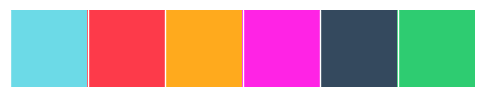

In [27]:
#Checking out seaborn color palette.
flatui = ["#6cdae7", "#fd3a4a", "#ffaa1d", "#ff23e5", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

## Question 1: What are the overall global trends for suicide rates from 1990 to 2015?

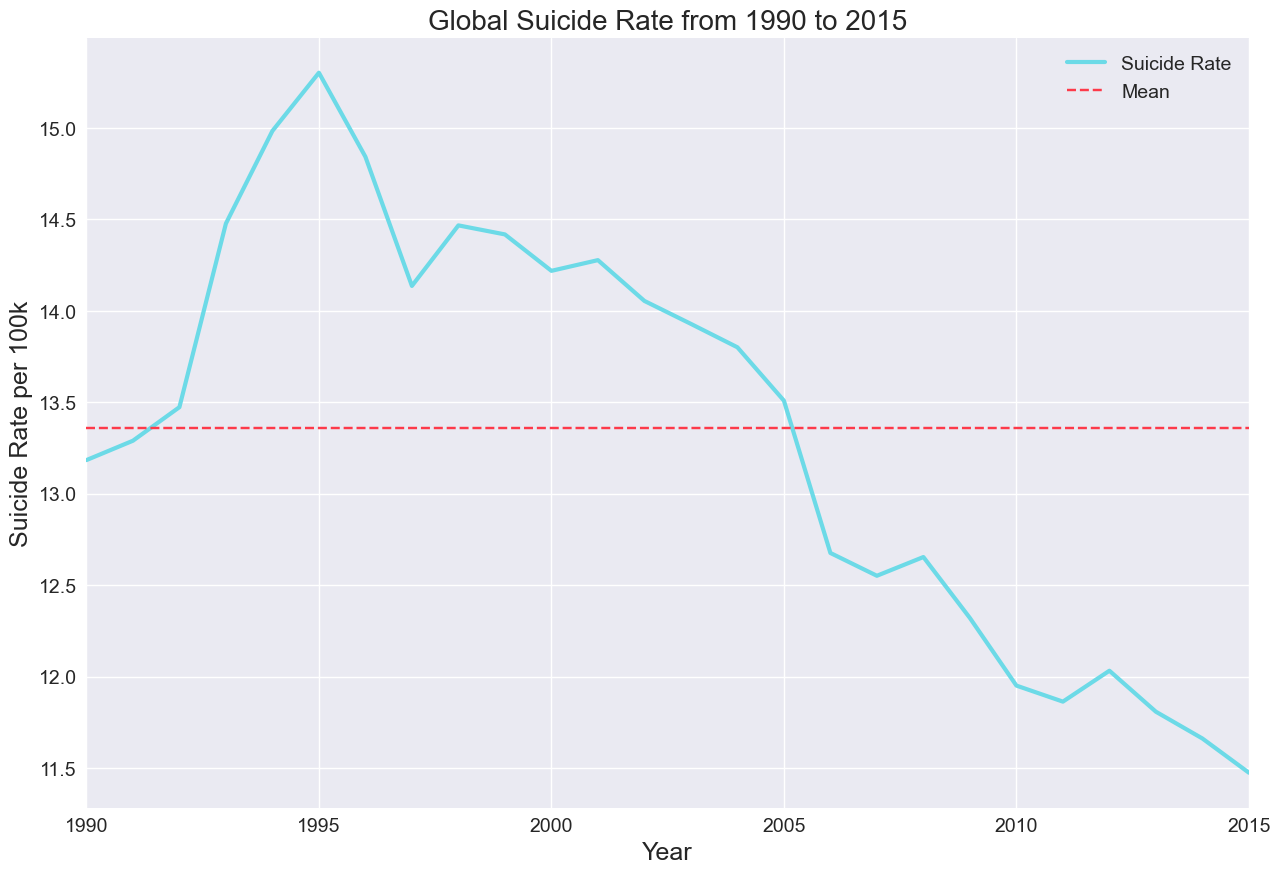

In [28]:
#Creating line chart to observe overall global trends from 1990-2015.
curr = global_suicide_data.dropna().groupby(['Year']).sum().reset_index()
curr['per_100k'] = curr['SuicidesNo'] * 100000 / curr['Population'] #Recalculating rate
plt.figure(figsize = (15,10))
plt.plot(curr['Year'], curr['per_100k'], label = "Suicide Rate", linewidth=3) #Plotting data
plt.plot(curr['Year'], [curr['per_100k'].mean()] * len(curr), '--', label = "Mean") #Adding mean line
plt.title("Global Suicide Rate from 1990 to 2015", fontsize = 20) #Adding title, labels, limits, adjusting font
plt.xlabel("Year", fontsize = 18)
plt.xlim(min(curr['Year']), max(curr['Year']))
plt.xticks(fontsize=14)
plt.ylabel("Suicide Rate per 100k", fontsize = 18)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

The above line chart represents the global suicide rates from 1990 to 2015. It demonstrates an increase in suicides from 1990 with a significant peak in 1995, then the global suicide rate decreases from 1995 to 2015. From 2005 to 2015, the global suicide rate is below the mean suicide rate of all the years.

<function matplotlib.pyplot.show(close=None, block=None)>

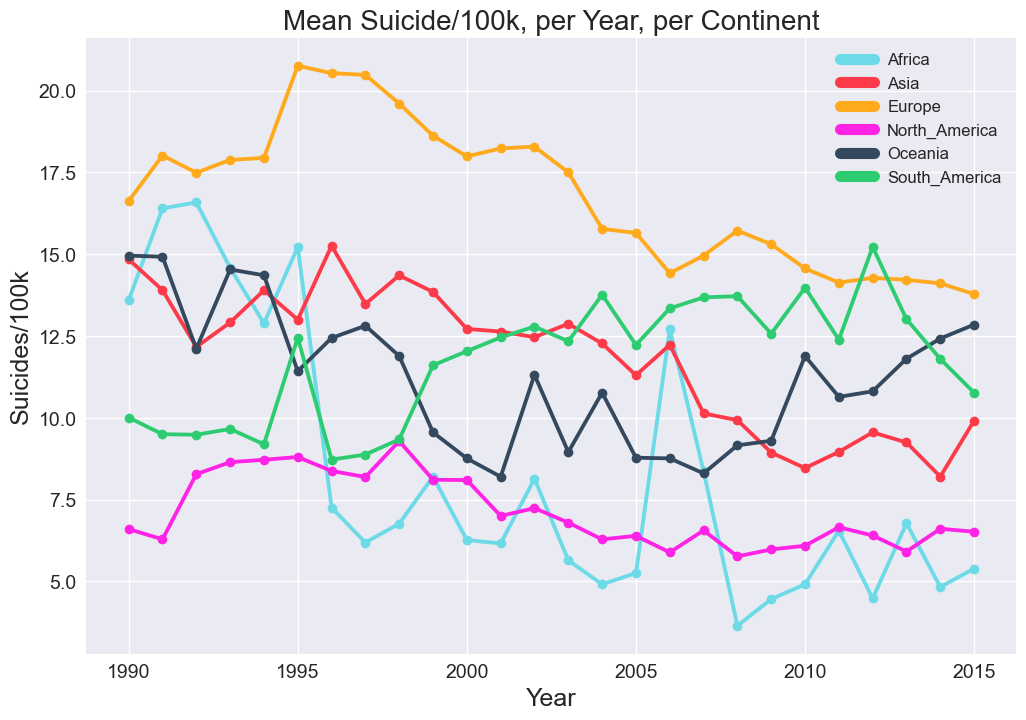

In [29]:
#Creating line chart to observe overall global trends per continent from 1990-2015.
curr2 = global_suicide_data.groupby(['Continent','Year'],sort=True,as_index=False)['Suicides/100kPop'].mean()
by_cont = curr2.groupby('Continent')
 
for name, group in by_cont: #Creating loop for continents
    plt.plot(group['Year'], group['Suicides/100kPop'], label=name, marker ='o', linewidth=2.75)

plt.title('Mean Suicide/100k, per Year, per Continent', fontsize = 20) #Adding title, labels, adjusting font
plt.ylabel('Suicides/100k', fontsize = 18)
plt.yticks(fontsize = 14) 
plt.xlabel('Year', fontsize = 18)
plt.xticks(fontsize = 14)
leg = plt.legend(fontsize = 12)
for line in leg.get_lines(): #Loop for legend
    line.set_linewidth(8)
plt.show

The above line chart demonstrates the suicide rates per 100,000 individuals per continent from 1990 to 2015. It is interesting that Africa had a significant spike in 2006 and that Europe has the highest suicide rate of all the continents for most years. After researching further, Africa has difficulty tracking their suicide rates indicating that some years may have lower reportings than actual suicides. Nothing significant seemed to occur during the year 2006 that would have caused an increase in cases for Africa (source: World Health Organization). I think these results are probably more accurate than other years. Overall, most continents have seen a decrease in suicide rates from 1990, except for South America which demonstrated an increase over the majority of years and ended up having approximately the same rate in 2015 as 1990.

In [30]:
#Grouping data by continent.
data_per_continent = global_suicide_data.groupby('Continent').mean()
data_per_continent

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Continent,,,,,
Africa,2004.935484,14.330645,1.213268e+06,7.128038,7318.741935
Asia,2003.198880,301.076564,2.077240e+06,11.647376,17095.092437
Europe,2002.908590,289.540565,1.592144e+06,16.788581,24124.629956
North_America,2002.809045,241.890075,2.312137e+06,7.070798,12211.140704
Oceania,2001.690141,84.953052,6.618283e+05,11.061232,21821.563380
South_America,2002.445736,130.819444,2.267666e+06,11.830197,6933.422481


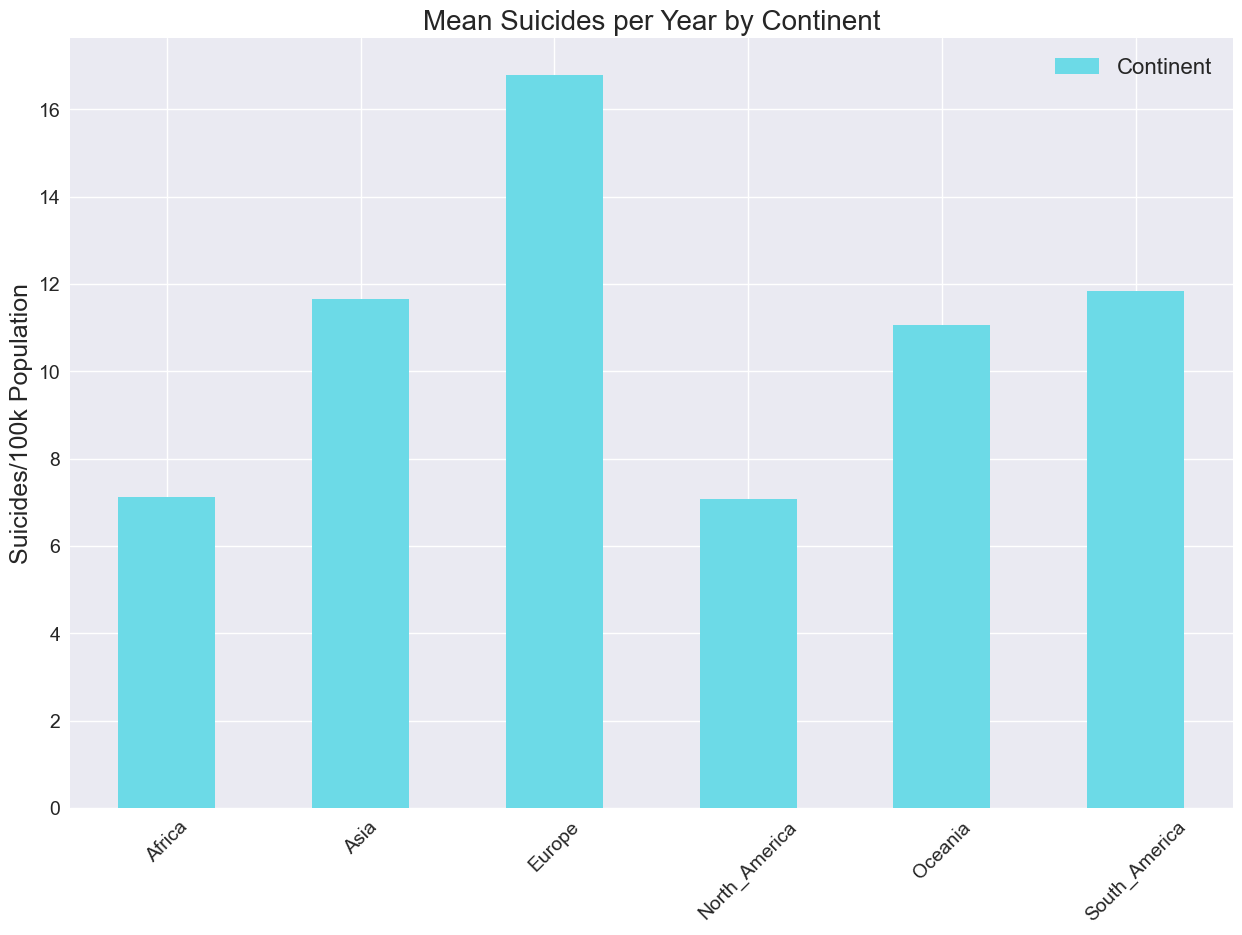

In [31]:
#Creating bar graph for mean suicides/year by continent.
ax = data_per_continent['Suicides/100kPop'].plot(kind='bar', figsize=(15, 10), fontsize=14, align = 'center')
plt.title('Mean Suicides per Year by Continent', fontsize = 20) #Adding title, labels, adjusting fontsize
ax.set_xlabel('')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylabel("Suicides/100k Population", fontsize=18)
plt.legend(['Continent'], prop={'size':16})
plt.show()

The above bar graph demonstrates the suicide rates per 100,000 individuals per continent from 1990 to 2015. Europe has a higher suicide rate than other countries. Maybe this is because of the higher suicide rate in Russia and post-soviet countries

In [71]:
#Looking at median value by continent
data_per_continent_med = global_suicide_data.groupby('Continent').median()
data_per_continent_med

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Continent,,,,,
Africa,2005.5,4.0,98129.0,1.575,6545.0
Asia,2003.0,25.0,503790.0,4.730,9046.0
Europe,2003.0,51.0,565622.5,8.575,19076.5
North_America,2003.0,4.0,249446.5,1.680,6804.5
Oceania,2001.0,19.5,290755.0,6.500,19469.0
South_America,2003.0,27.0,438194.0,6.125,5013.0


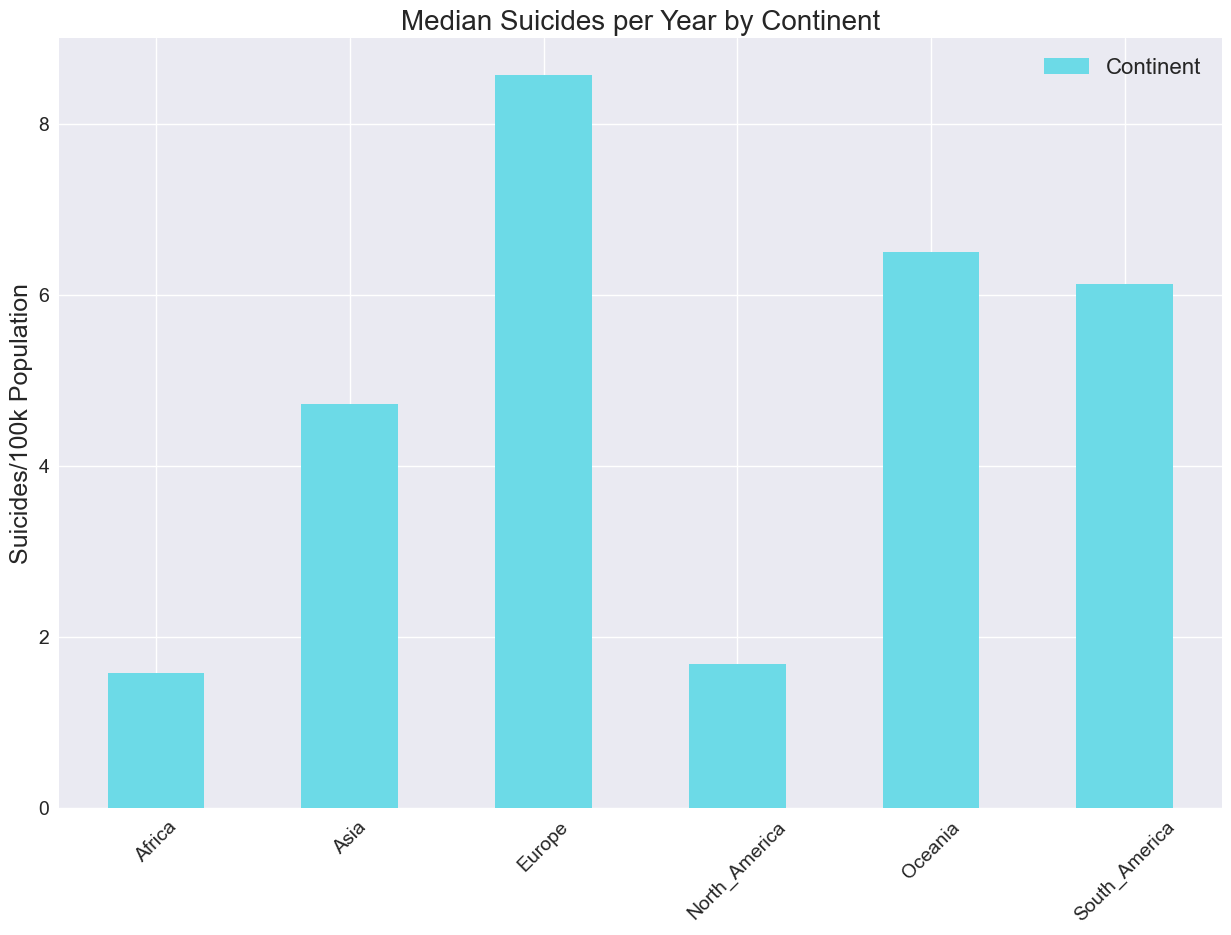

In [72]:
#Creating bar graph for median suicides/year by continent.
ax = data_per_continent_med['Suicides/100kPop'].plot(kind='bar', figsize=(15, 10), fontsize=14, align = 'center')
plt.title('Median Suicides per Year by Continent', fontsize = 20) #Adding title, labels, adjusting fontsize
ax.set_xlabel('')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylabel("Suicides/100k Population", fontsize=18)
plt.legend(['Continent'], prop={'size':16})
plt.show()

There is a significant differnce between mean and median values, thus since this is evidence of strong outliers in the data set

## Top 10 Countries by Suicide Rate

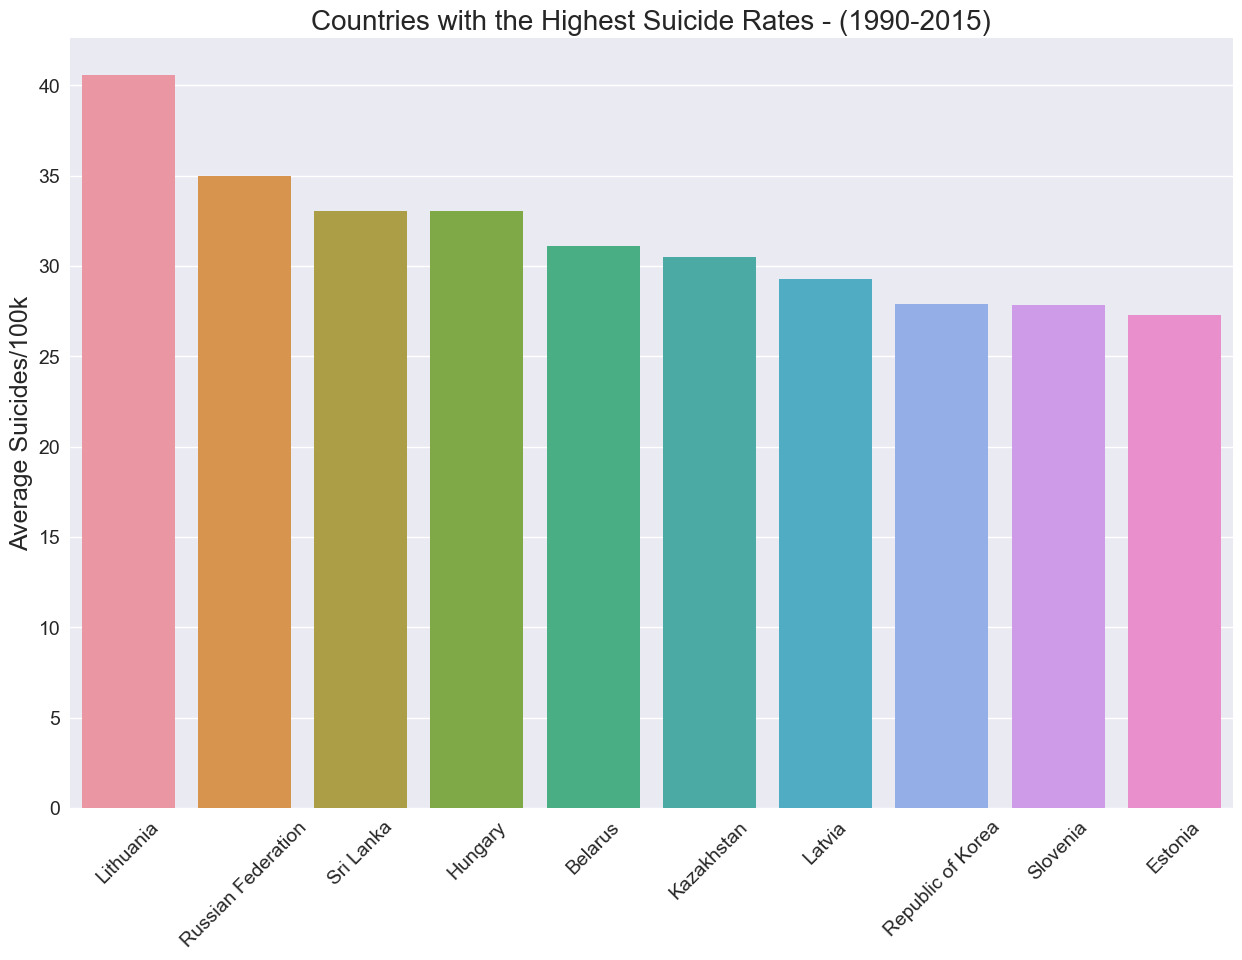

In [32]:
#Bar graph for the top 10 countries with the highest suicide rate per 100k/pop.
#Grouped by country and found the mean of the data to find the countries with the highest rates.
data_suicide_mean = global_suicide_data['Suicides/100kPop'].groupby(global_suicide_data.Country).mean().sort_values(ascending=False)
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(data_suicide_mean.head(10).index,data_suicide_mean.head(10))
plt.ylabel('Average Suicides/100k', fontsize = 18) #Adding labels, titles, adjusting font size
plt.xlabel('')
plt.title('Countries with the Highest Suicide Rates - (1990-2015)', fontsize = 20) 
plt.xticks(fontsize = 14,rotation=45) 
plt.yticks(fontsize = 14)
plt.show()

In [33]:
global_suicide_data.columns


Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides/100kPop', 'GdpForYear($)', 'GdpPerCapital($)', 'Generation',
       'Continent'],
      dtype='object')

In [34]:
global_suicide_data[['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 
                     'Population']].groupby(['Country']).sum().sort_values(by=['SuicidesNo'])

,Year,SuicidesNo,Population
Country,,,
Saint Kitts and Nevis,71676,0,117300
San Marino,72048,4,78825
Antigua and Barbuda,528612,11,1687321
Maldives,240612,20,2900246
Macau,23928,27,346542
...,...,...,...
Ukraine,600624,289262,1143783384
Germany,624780,291262,2024875612
Japan,624780,690809,3109253644


In [35]:
#Creating new dataframe based off top 5 countries found above.
top_five = global_suicide_data[global_suicide_data['Country'].isin(['Russian Federation','United States','Japan',
                                                                 'France','Ukraine'])]
top_five

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation,Continent
9146,France,1990,male,75+ years,1441,1360900,105.89,"1,269,179,616,914",23968,G.I. Generation,Europe
9147,France,1990,male,55-74 years,1986,4746800,41.84,"1,269,179,616,914",23968,G.I. Generation,Europe
9148,France,1990,male,35-54 years,2816,7267500,38.75,"1,269,179,616,914",23968,Silent,Europe
9149,France,1990,male,25-34 years,1314,4289900,30.63,"1,269,179,616,914",23968,Boomers,Europe
9150,France,1990,female,75+ years,661,2583600,25.58,"1,269,179,616,914",23968,G.I. Generation,Europe
...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,female,25-34 years,1444,21555712,6.70,"18,120,714,000,000",60387,Millenials,North_America
27216,United States,2015,female,15-24 years,1132,21633813,5.23,"18,120,714,000,000",60387,Millenials,North_America
27217,United States,2015,female,75+ years,540,11778666,4.58,"18,120,714,000,000",60387,Silent,North_America
27218,United States,2015,male,5-14 years,255,21273987,1.20,"18,120,714,000,000",60387,Generation Z,North_America


In [36]:
top_five.Country.unique() # It worked

array(['France', 'Japan', 'Russian Federation', 'Ukraine',
       'United States'], dtype=object)

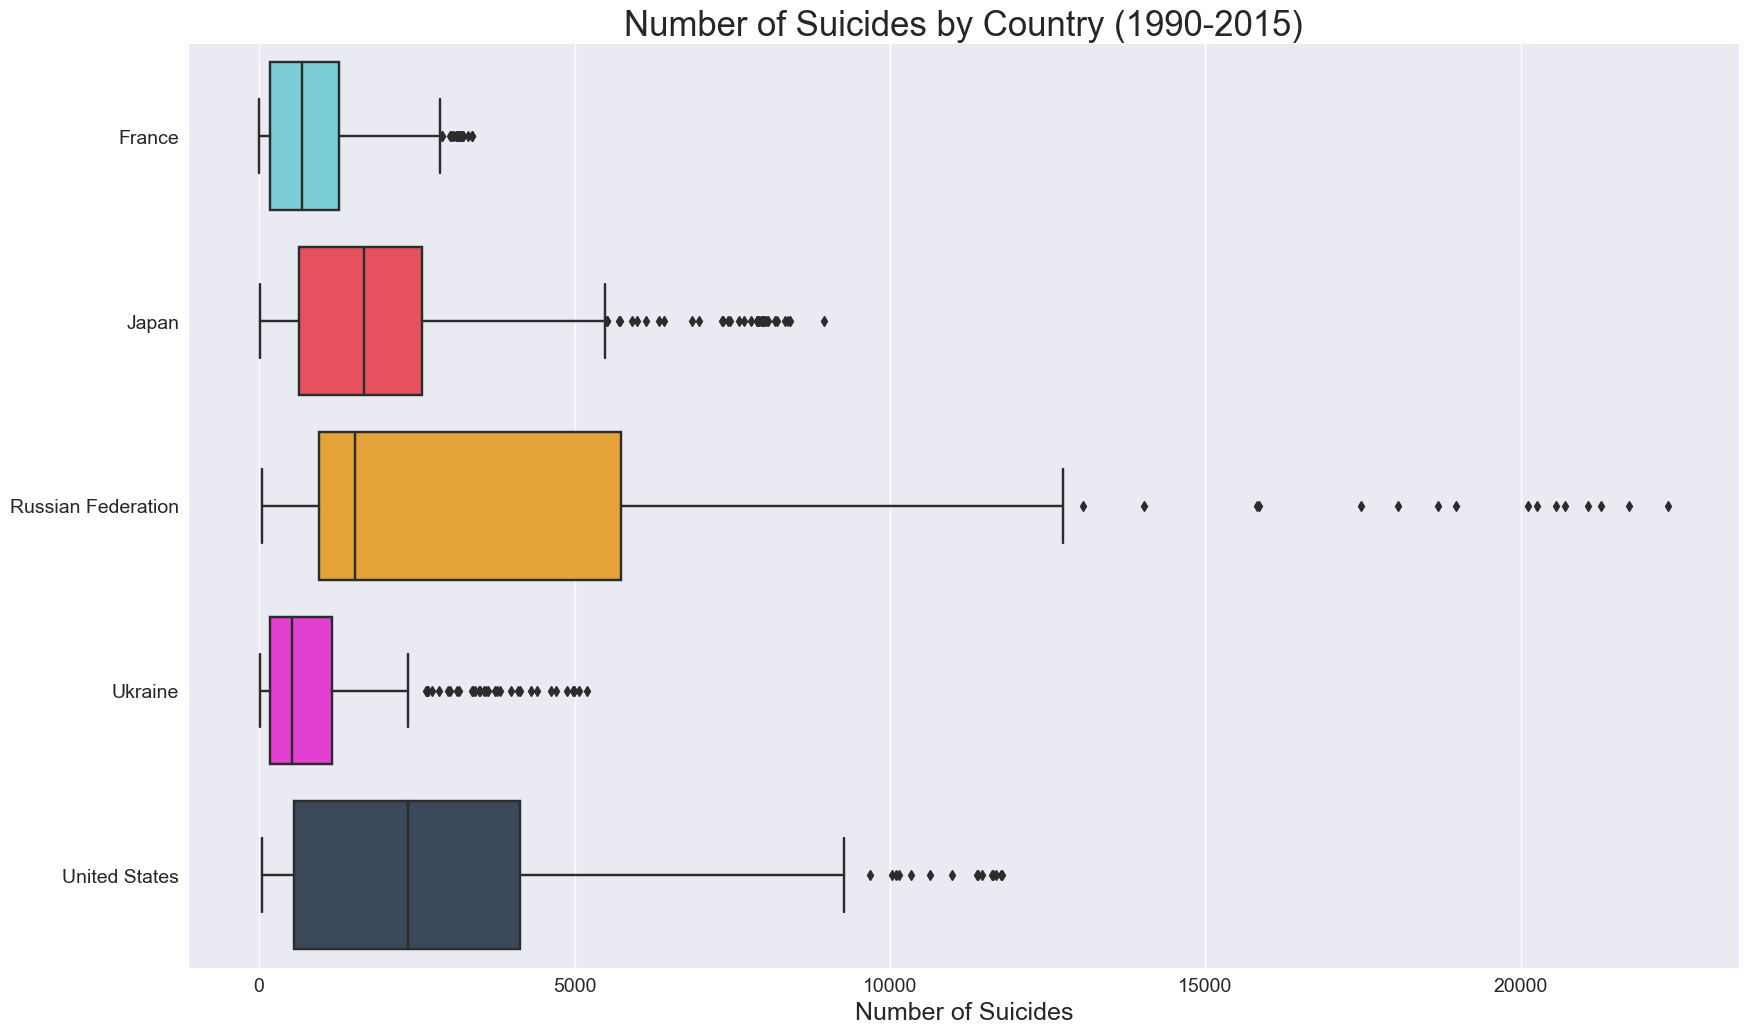

In [37]:
#Creating boxplots for the top 5 countries with the highest number of suicides.
fig, ax = plt.subplots(1,1,figsize=(20,12))
ax = sns.boxplot(x='SuicidesNo',y='Country',data=top_five)
plt.title('Number of Suicides by Country (1990-2015)', fontsize = 25)
plt.xlabel('Number of Suicides', fontsize = 18)
plt.ylabel('', fontsize=12) # This deltes the y-axis label so you can just see the countries names. Cleaner look
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The above boxplots represent the top 5 countries that have the highest suicide totals from 1990 to 2015. There are signficant outliers for each country. These countries also have a larger population than other countries. Clearly, the Russian Federation has the highest number of suicides out of these countries

## Obsering Data from 2015

In [38]:
#I decided to look into the most recent year.
#Pulling new data frame with only data from 2015.
df2015 = global_suicide_data[global_suicide_data.Year == 2015]

In [39]:
#Pulling important columns.
df2015 = df2015[['Country','Suicides/100kPop','GdpPerCapital($)', 'Continent', 'Population']]

In [40]:
#Checking out new dataframe.
df2015

,Country,Suicides/100kPop,GdpPerCapital($),Continent,Population
576,Antigua and Barbuda,15.62,14853,North_America,6403
577,Antigua and Barbuda,0.00,14853,North_America,8561
578,Antigua and Barbuda,0.00,14853,North_America,7740
579,Antigua and Barbuda,0.00,14853,North_America,15323
580,Antigua and Barbuda,0.00,14853,North_America,8239
...,...,...,...,...,...
27551,Uruguay,9.91,16696,South_America,232133
27552,Uruguay,8.63,16696,South_America,440475
27553,Uruguay,6.66,16696,South_America,255067
27554,Uruguay,1.19,16696,South_America,252509


In [41]:
#Grouping by country and finding the sum.
df2015check = df2015.groupby('Country').sum()
#Checking out dataframe.
df2015check.reset_index(level=0, inplace=True)
df2015check

,Country,Suicides/100kPop,GdpPerCapital($),Population
0,Antigua and Barbuda,15.62,178236,91889
1,Argentina,112.13,179772,39699624
2,Armenia,45.28,45300,2795335
3,Australia,154.18,727872,22240785
4,Austria,194.62,557808,8219386
...,...,...,...,...
57,Turkmenistan,28.48,87912,4886514
58,Ukraine,244.72,27072,40345446
59,United Kingdom,86.74,566880,61082942
60,United States,175.41,724644,300078511


In [42]:
#Creating new dataframe, grouping by continent and country, finding the sum.
dfcont = df2015.groupby(['Continent','Country'],sort=True,as_index=False)['Suicides/100kPop','GdpPerCapital($)'].sum()
dfcont

,Continent,Country,Suicides/100kPop,GdpPerCapital($)
0,Africa,Mauritius,99.97,121500
1,Africa,Seychelles,81.25,192060
2,Africa,South Africa,13.00,76836
3,Asia,Armenia,45.28,45300
4,Asia,Israel,65.91,477516
...,...,...,...,...
57,South_America,Brazil,77.45,113172
58,South_America,Chile,147.68,176748
59,South_America,Colombia,70.40,78624
60,South_America,Ecuador,97.39,81984


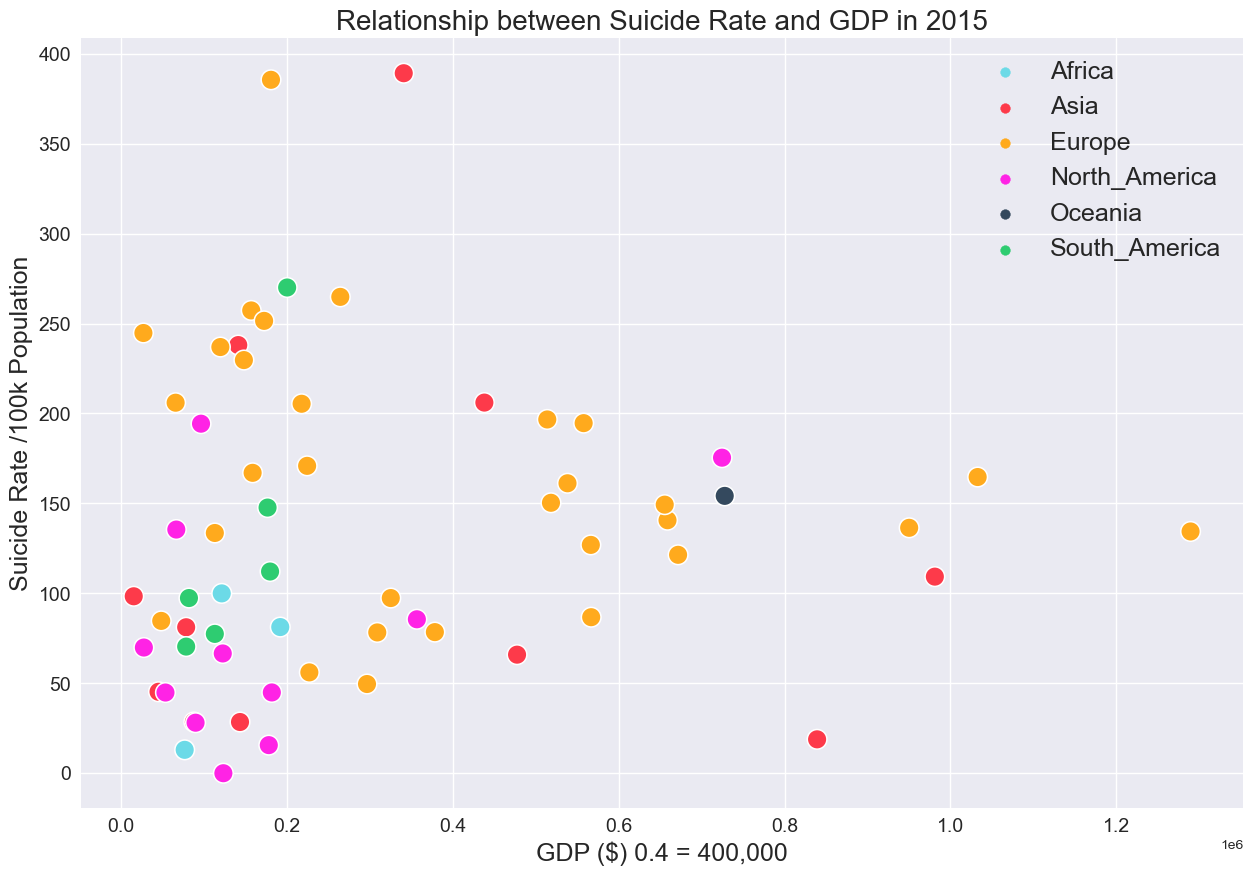

In [43]:
#Creating a scatterplot for gdp vs suicide rate/100kPop for each continent.
plt.figure(figsize = (15,10))
sns.scatterplot(x = 'GdpPerCapital($)',s = 200, y = 'Suicides/100kPop',data = dfcont, hue = 'Continent') 
plt.title('Relationship between Suicide Rate and GDP in 2015', fontsize = 20) #Adding title, labels, legend, adjusting font size
plt.ylabel('Suicide Rate /100k Population', fontsize = 18)
plt.xlabel('GDP ($) 0.4 = 400,000', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 1, prop = {'size': 18})
plt.show()

There seems to be a clustering around 200,000 so I am going to explore this in more depth

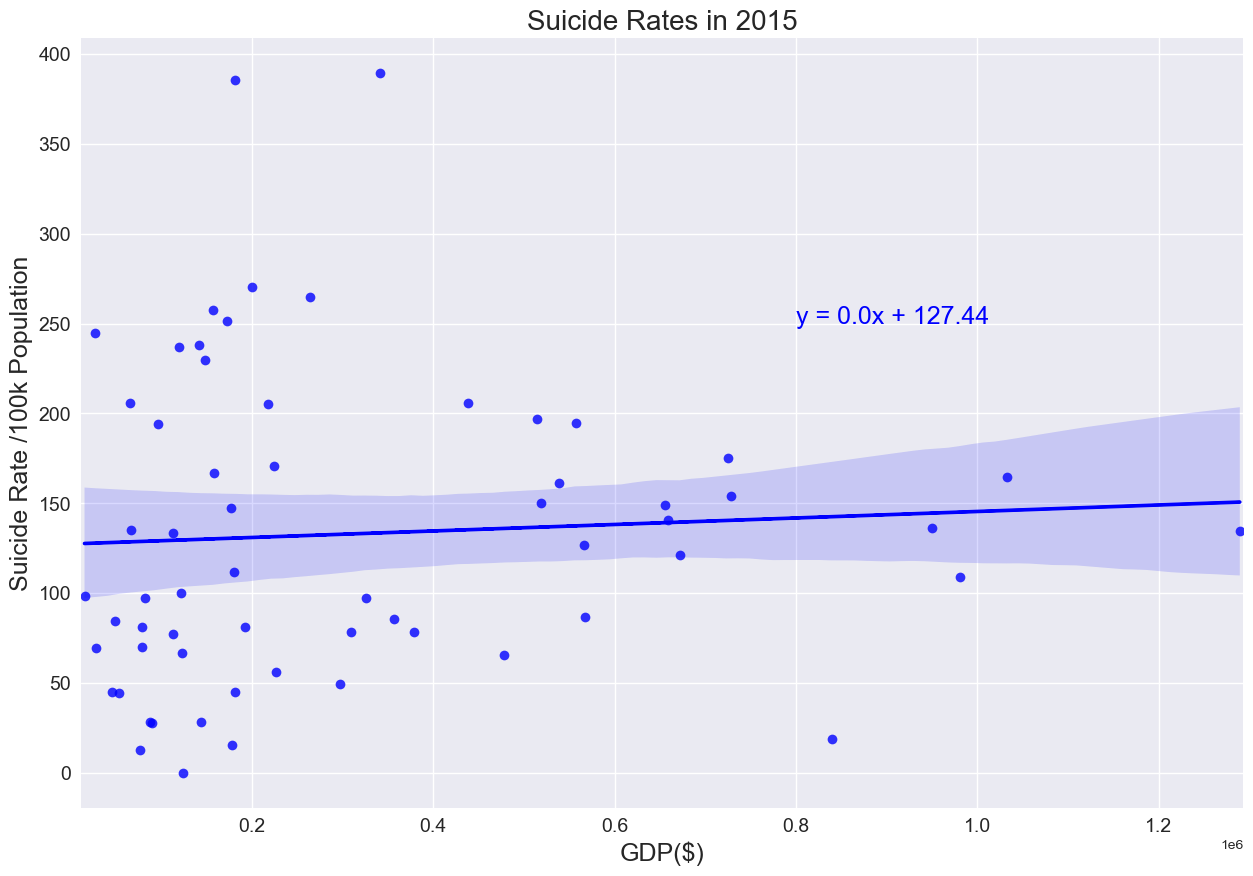

The correlation coefficient, r, is: 0.06144101302985553
And r-squared is: 0.003774998082134877


In [44]:
#Linear regression graph for gdp vs suicide rate/100kPop for each continent to see if there is a correlation
#between both variables.
(slope, intercept, rvalue, pvalue, stderr) = st.mstats.linregress(dfcont['GdpPerCapital($)'], dfcont['Suicides/100kPop'])  #Create linear regression line
regress_values = dfcont['GdpPerCapital($)'] * slope + intercept
linreg_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))  
plt.figure(figsize=(15,10))
sns.regplot(x="GdpPerCapital($)", y="Suicides/100kPop", data=dfcont, color = 'b')
plt.plot(dfcont['GdpPerCapital($)'],regress_values,"r-", color = 'blue')
plt.annotate(linreg_eq, (800000,250), fontsize=18, color = 'blue') #Plotting the linear regression line
plt.title('Suicide Rates in 2015', fontsize= 20)
plt.ylabel('Suicide Rate /100k Population', fontsize = 18)
plt.xlabel('GDP($)', fontsize = 18)
plt.xticks(fontsize=14)
plt.xlim(min(dfcont["GdpPerCapital($)"]) - 4000, max(dfcont["GdpPerCapital($)"]) + 4000)
plt.yticks(fontsize=14)
plt.show()

print(f'The correlation coefficient, r, is: {rvalue}') #Printing the r value to analyze correlation
print(f'And r-squared is: {rvalue**2}') #Printing the r squared value

From the above linear regression graph, it's clear there is a clustering of values with low GDP and more suicide rates per 100,000 individuals. However, due to the correlation coefficient of .061 and the insignificant linear regression equation, a linear relationship does not exist between these two variables. If I had more time, I would have explored this relationship further through a histogram or other type of graph. It seems unlikely that a linear relationship is the best model between these two variables

## Question 2: Which age group falls victim to suicide most frequently?

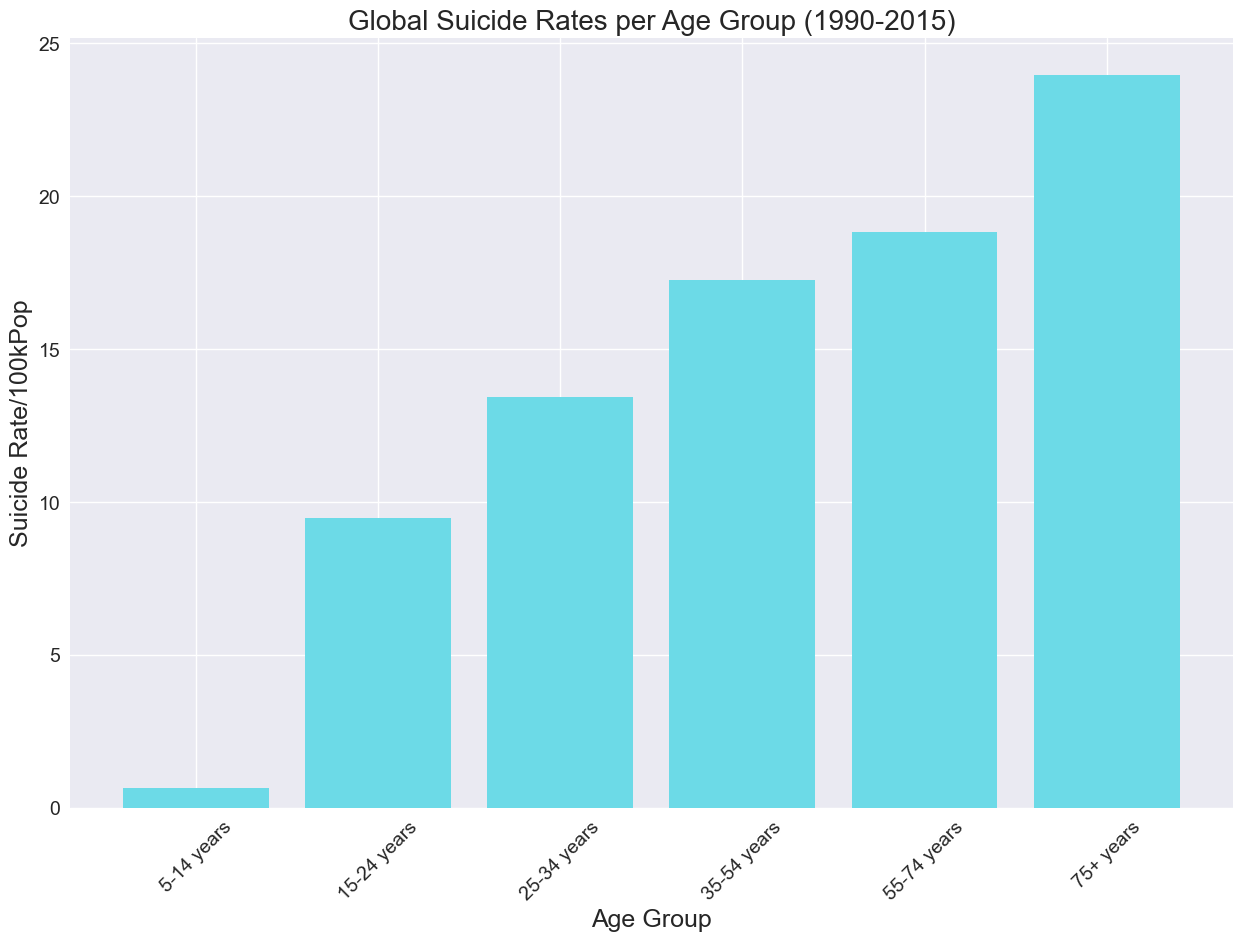

In [75]:
#Creating a bar graph for suicide rates per age group from 1990-2015.
curr = global_suicide_data.groupby(['Age']).sum().reset_index() #Getting xticks in correct order
xticks = [2, 3, 4, 1, 5, 6]

curr['order'] = xticks
curr = curr.sort_values(['order'], ascending=True).reset_index(drop=True)
curr

plt.figure(figsize=(15,10))
plt.bar(curr['Age'].values, curr['SuicidesNo'].values * 100000 / curr['Population'].values) #Plotting graph
plt.title('Global Suicide Rates per Age Group (1990-2015)', fontsize = 20) #Adding title, labels, adjusting font size
plt.xlabel('Age Group', fontsize = 18)
plt.ylabel('Suicide Rate/100kPop', fontsize = 18)
plt.xticks(rotation = 45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The suicide rate gets higher and higher the older one gets

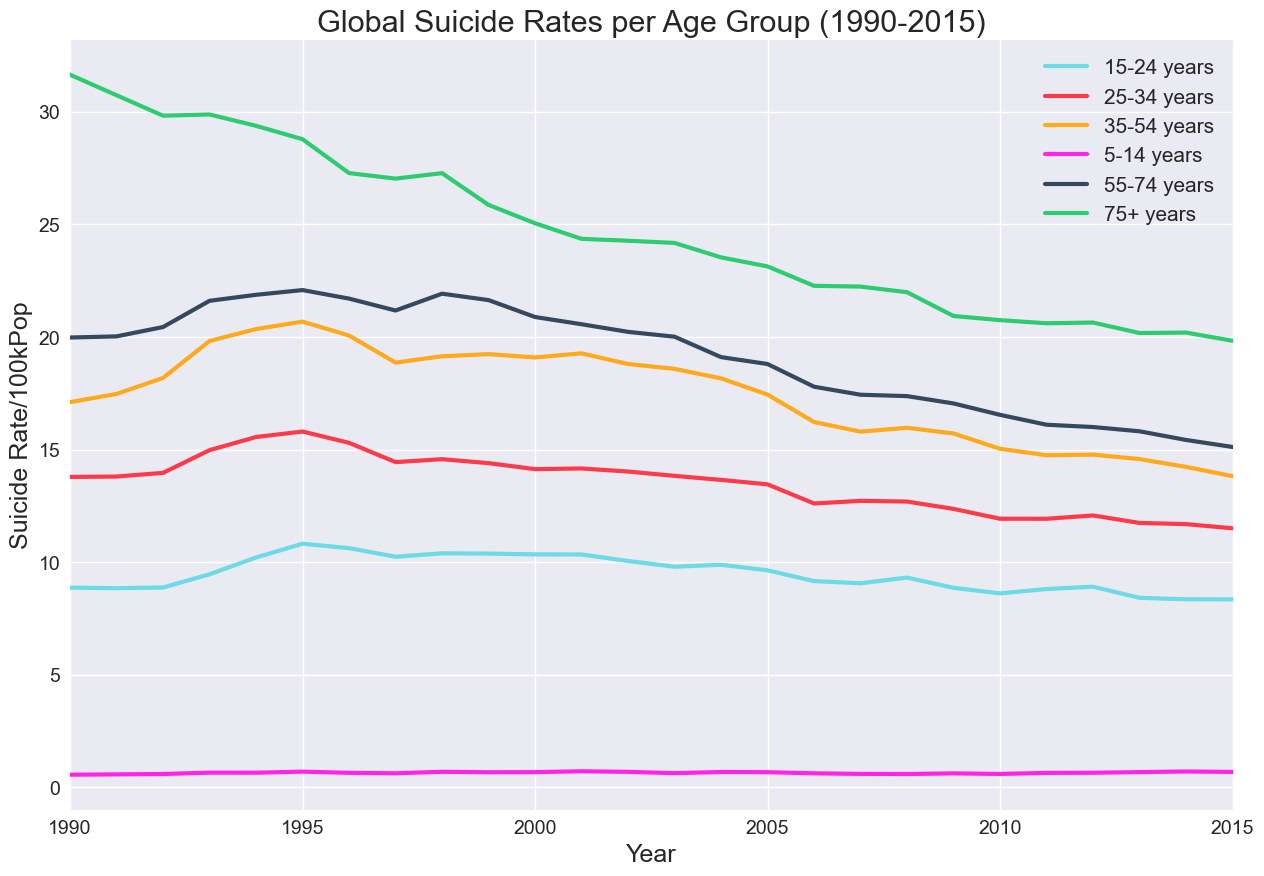

In [46]:
#Creating a line graph for suicide rates per age group from 1990-2015. 
curr = global_suicide_data.groupby(['Year', 'Age']).sum().reset_index()
plt.figure(figsize = (15,10))
for age_group in curr['Age'].unique(): #Creating loop for age groups
    sub = curr[curr['Age'] == age_group] 
    sub['per_100k'] = sub['SuicidesNo'] * 100000 / sub['Population']
    plt.plot(sub['Year'], sub['per_100k'], label = age_group, linewidth = 3)

plt.title('Global Suicide Rates per Age Group (1990-2015)', fontsize = 22) #Adding title, labels, adjusting fonts
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Suicide Rate/100kPop', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(min(curr['Year']), max(curr['Year']))
plt.legend(prop = {'size': 15}) #Adding legend
plt.show()

The suicide rate decreased for the age groups 25+, but for 15-24 and 5-14 they stay about the same from 1990 to 2015.

## Does Gender Play a Role in Suicide?

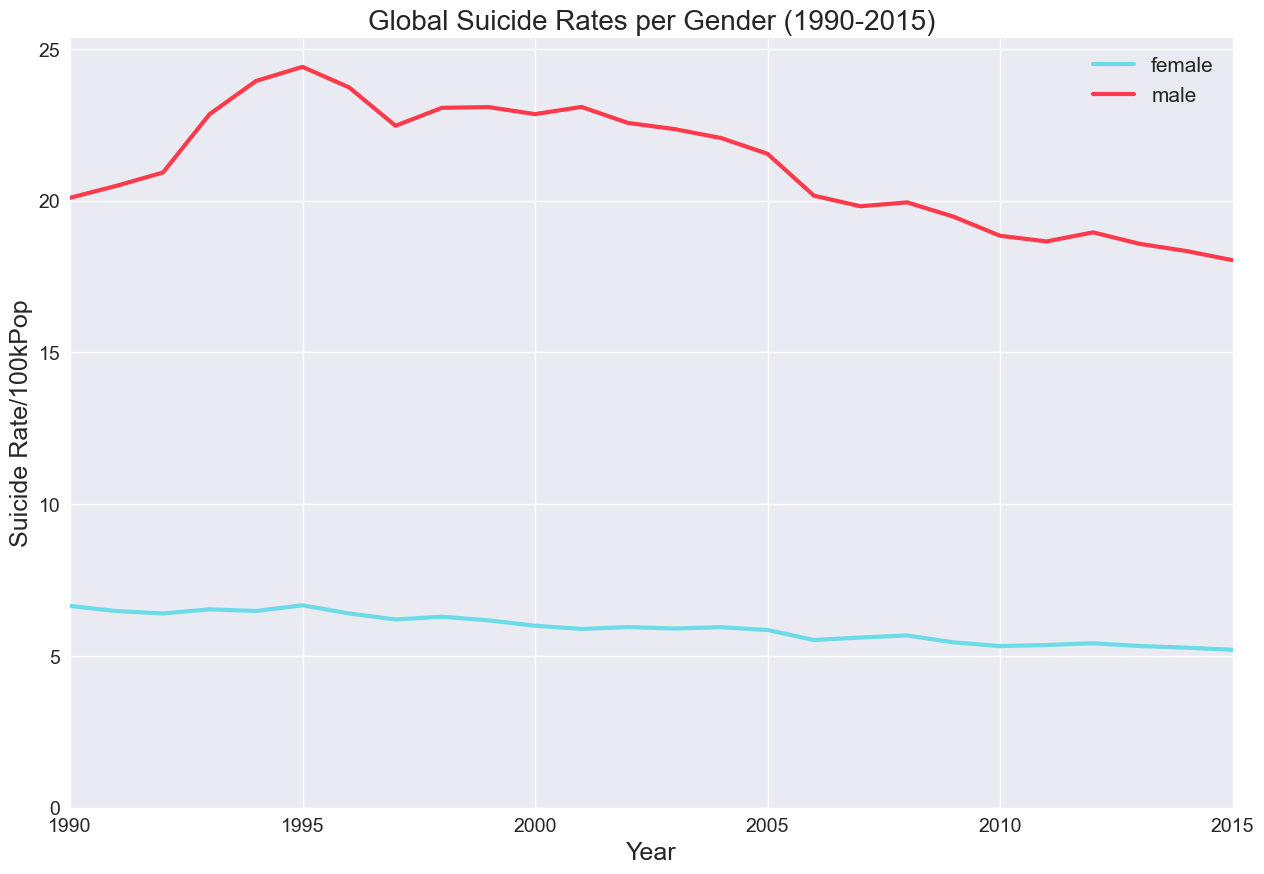

In [47]:
#Creating a line chart to compare gender trends globally from 1990 to 2015.
curr = global_suicide_data[(global_suicide_data['SuicidesNo'] != np.NaN) & (global_suicide_data['Population'] != np.NaN)]
curr = global_suicide_data.groupby(['Year', 'Gender']).sum().reset_index() #Grouping by year and gender, finding sum
plt.figure(figsize = (15,10))
for sex in curr['Gender'].unique(): #Loop for each gender
    sub = curr[curr['Gender'] == sex]
    sub['per_100k'] = sub['SuicidesNo'] * 100000 / sub['Population'] #Recalculating suicides/100kPop
    plt.plot(sub['Year'], sub['per_100k'], label = sex, linewidth=3)

plt.title('Global Suicide Rates per Gender (1990-2015)', fontsize = 20) #Adding title, labels, limits, adjusting font
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Suicide Rate/100kPop', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(min(curr['Year']), max(curr['Year']))
plt.ylim(bottom = 0)
plt.legend(prop = {'size': 15}) #Adding legend
plt.show()

It should be noted that the data only includes two genders: female and male. Thus other genders aren't available in the analysis. 

Note that males have a way higher suicide rate than females. We also see that there is a small decrease in suicide rate for both females and males from 1990.

In [48]:
#Calculating percentage for each gender for suicides from 1990 to 2015.
suicide_gender = global_suicide_data.groupby("Gender")

gender_suicide_percent = 100*suicide_gender['SuicidesNo'].sum()/global_suicide_data['SuicidesNo'].sum()
gender_suicide_percent

Gender
female    22.67246
male      77.32754
Name: SuicidesNo, dtype: float64

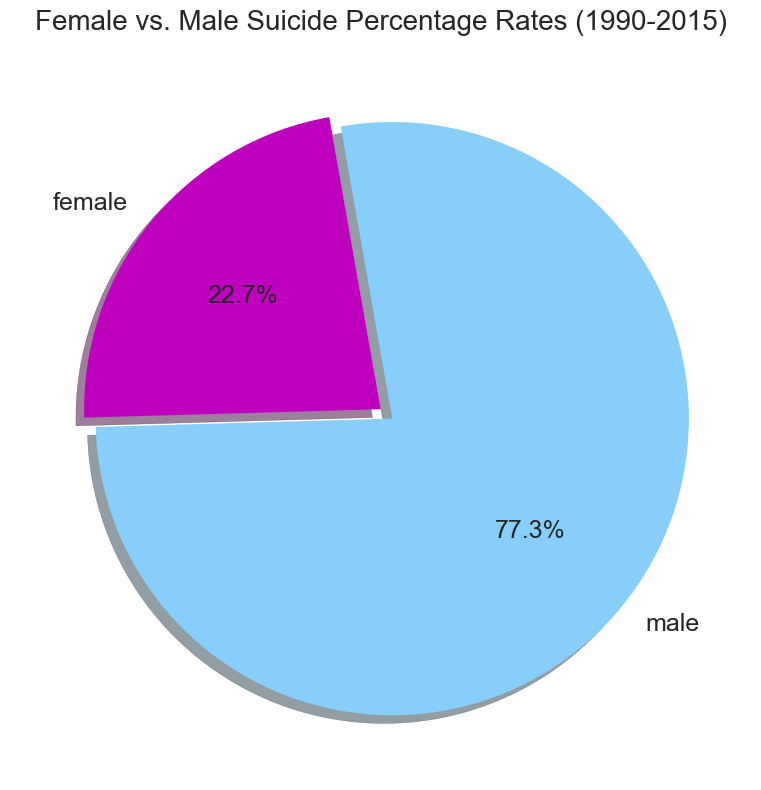

In [49]:
#Generate pie plot showing the distribution of female versus male suicide percent.
suicide_vs_age = gender_suicide_percent.plot(kind='pie', y='Gender', startangle=100, autopct='%1.1f%%',
                                             shadow=True, fontsize=18, legend =False, explode =(0, 0.05),
                                             colors = ['m', 'lightskyblue'])

plt.title("Female vs. Male Suicide Percentage Rates (1990-2015)", fontsize=20) #Adding title, labels
plt.ylabel('')
plt.tight_layout()
plt.show()

We see from the piegraph that males make up the clear majority in percentage of suicides in the world. 

## What are the suicide trends in the USA?

In [50]:
#Creating sub frame for USA only.
dfUSA = global_suicide_data[global_suicide_data.Country == 'United States']
usa_by_year = dfUSA.groupby('Year').sum()
usa_by_year

,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Year,,,,
1990,30895,229952200,187.80,312048
1991,30790,232955000,183.77,318036
1992,30471,235565600,177.77,333120
1993,31084,238092300,179.12,346692
1994,31123,240614100,176.03,364500
1995,31272,243164200,173.09,378216
1996,30879,245997800,166.45,395136
1997,30517,248486400,161.96,415728
1998,30558,251332500,160.51,433968


In [51]:
#Creating pearson map.
dfUSA.corr(method ='pearson')

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Year,1.000000,0.111635,0.185549,-0.032763,0.995510
SuicidesNo,0.111635,1.000000,0.567700,0.622911,0.109706
Population,0.185549,0.567700,1.000000,-0.132053,0.185005
Suicides/100kPop,-0.032763,0.622911,-0.132053,1.000000,-0.034364
GdpPerCapital($),0.995510,0.109706,0.185005,-0.034364,1.000000


<AxesSubplot:>

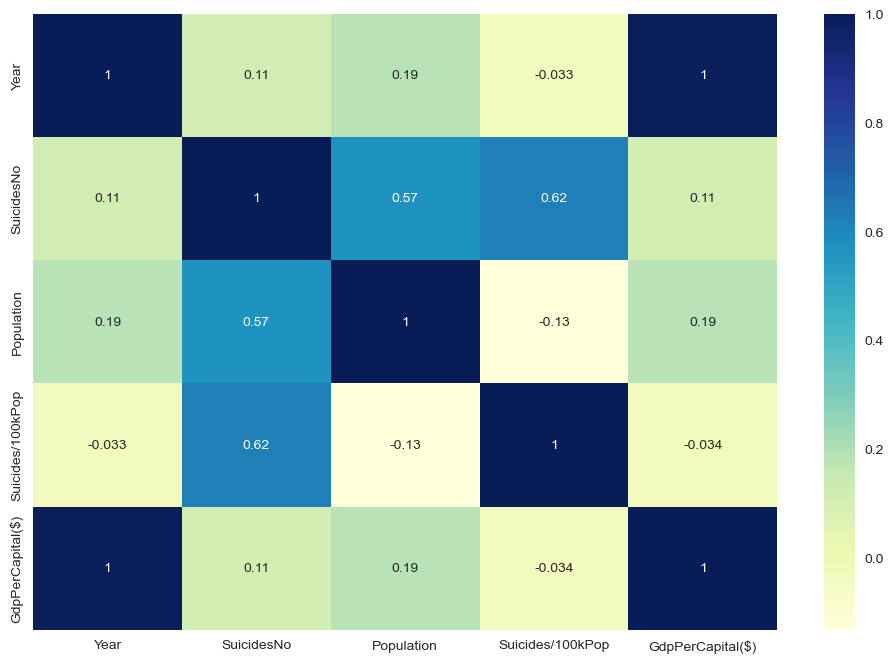

In [53]:
sns.heatmap(dfUSA.corr(method = 'pearson'),cmap='YlGnBu', annot=True)

Here we can see the correlation between the variables. Most of the correlations seem to be weak.

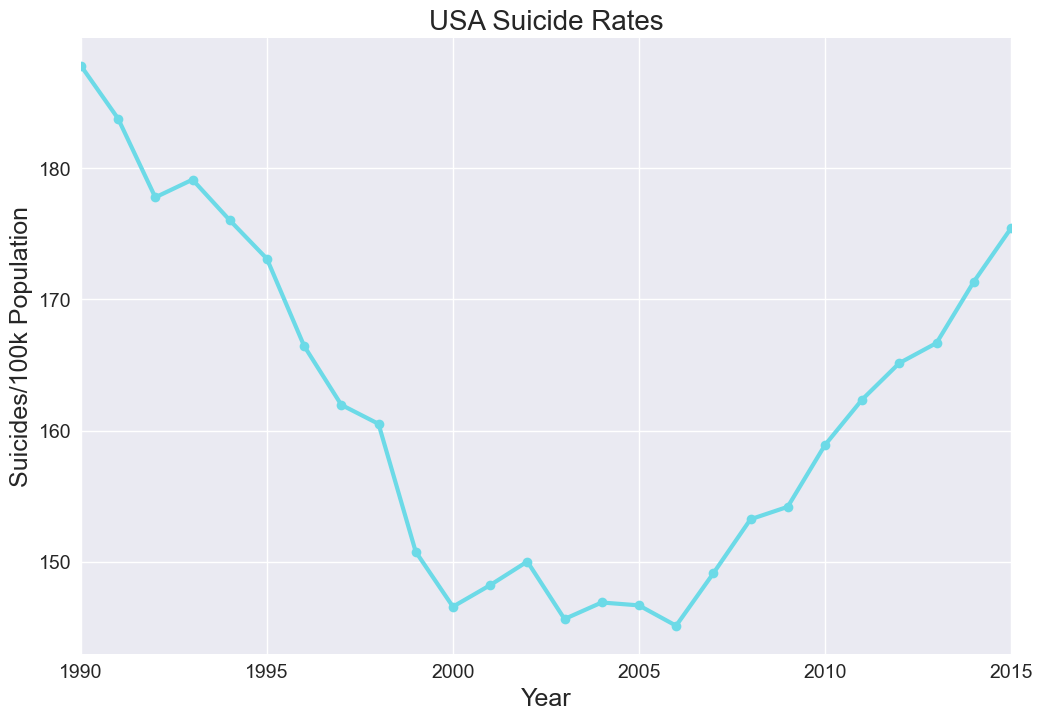

In [54]:
#Creating line chart for the sum of suicides/100kPop over time for the USA.
usa_by_year['Suicides/100kPop'].plot(linewidth = 3, marker = 'o')
plt.title('USA Suicide Rates', fontsize = 20) #Adding title, labels, limits, adjusting fontsize
plt.ylabel('Suicides/100k Population', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.xticks(fontsize = 14)
plt.xlim(min(usa_by_year.index), max(usa_by_year.index))
plt.yticks(fontsize = 14)
plt.show()

We see that suicide rate decreased from 1990 to 2000 yet then increased from 2006 to 2015. The 2015 level is still lower than the 1990 levels. 

## Observing Gender Trends in the USA

In [59]:
#Checking on the trends among genders in the US.
males= top_five['SuicidesNo'].loc[(top_five['Country']=='United States')
                                           &(top_five['Gender']=='male')]
females= top_five['SuicidesNo'].loc[(top_five['Country']=='United States')
                                             &(top_five['Gender']=='female')]

In [60]:
#Function to graph distribution of variable and highlight mean.
def distribution(variable, title):
    plt.figure()
    ax=sns.distplot(variable)
    plt.axvline(np.mean(variable), color='k',linestyle='dashed',linewidth=5)
    x, mx =plt.ylim()  
    plt.title('Total Suicide Distribution for ' + title + ' in the United States (1990-2015)', fontsize = 20)
    plt.xlabel('Total Suicides',  fontsize = 18) #Adding title, labels, saving image
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    return plt.figure()

In [61]:
#Finding total number of males and females.
print(len(males))
print(len(females))

156
156


 The mean for male suicide rates is 4490.071.


<Figure size 1200x800 with 0 Axes>

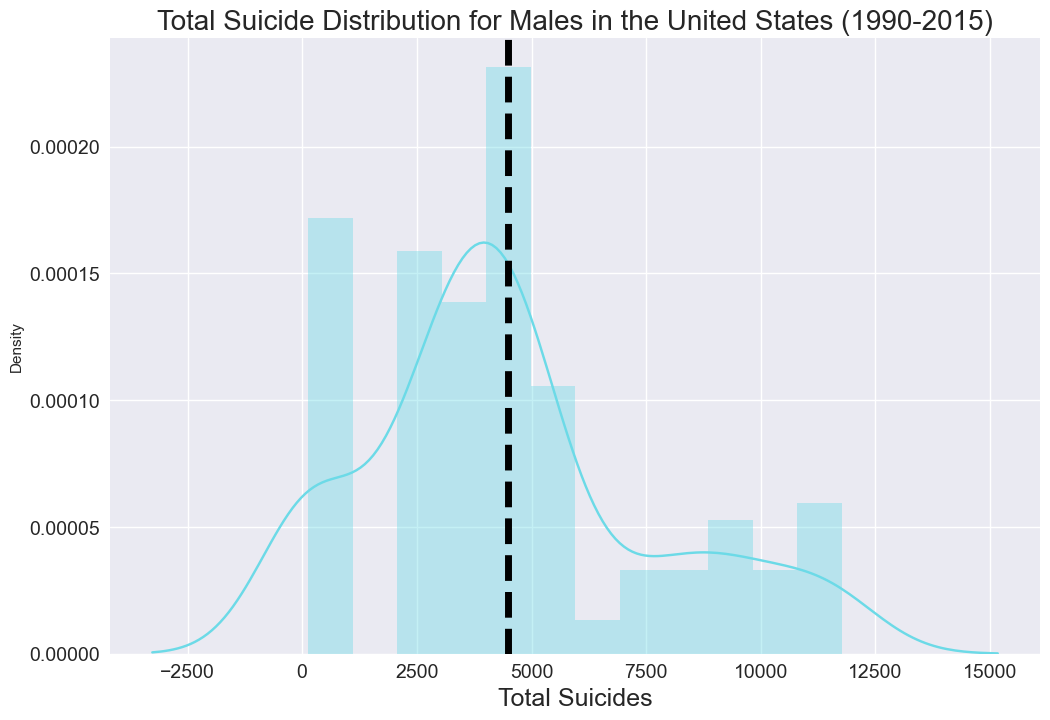

<Figure size 1200x800 with 0 Axes>

In [62]:
#Plotting male trends.
print(f' The mean for male suicide rates is {np.round(males.mean(),3)}.')
distribution(males, 'Males')

The above histogram represents the distribution of total suicides among males in the United States from 1990 to 2015 with a mean of 4490.071.

 The mean for female suicide rates is 1165.609.


<Figure size 1200x800 with 0 Axes>

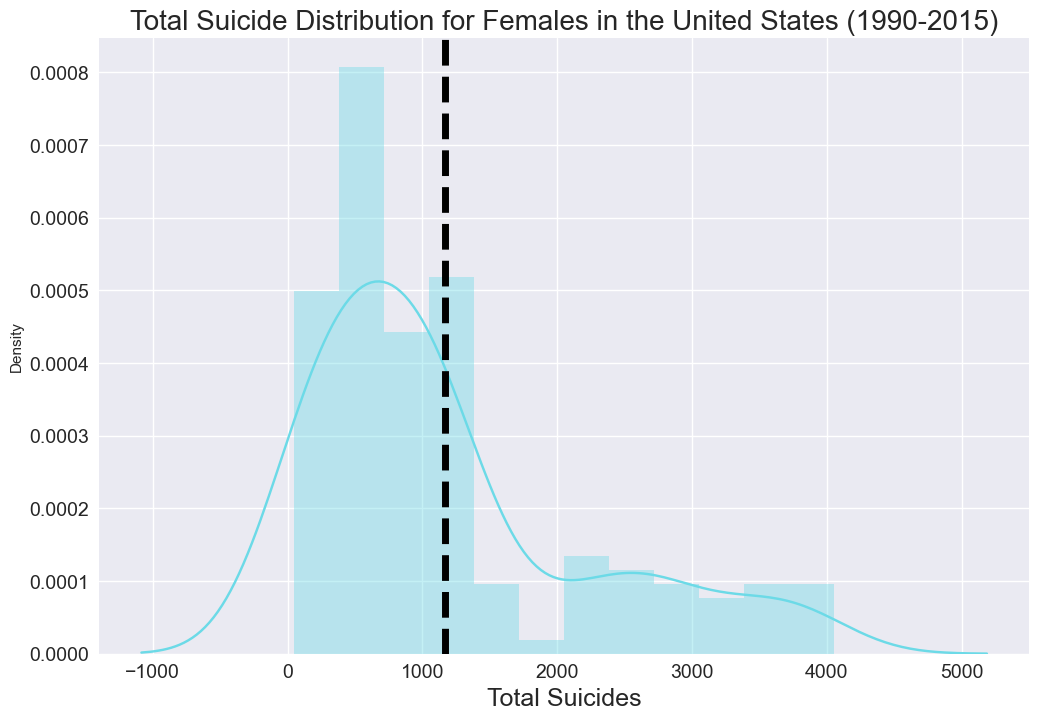

<Figure size 1200x800 with 0 Axes>

In [63]:
print(f' The mean for female suicide rates is {np.round(females.mean(),3)}.')
distribution(females, 'Females')

In [65]:
#Function to run independent t-test, test used to determine whether there is a
#statistically significant difference between the means in two unrelated groups (ex:Gender)
def ttestcompare(var1,var2,alpha):
    stat, p=ttest_ind(var1,var2)
    print('Statistics=%.3f, p%.7f' % (stat,p))
    if p>alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0) and accept the alternative hypothesis that both means are from different distributions')

In [66]:
ttestcompare(males, females,.05)

Statistics=12.663, p0.0000000
Different distributions (reject H0) and accept the alternative hypothesis that both means are from different distributions


There is a statisticaly significant differnce between males and females

## Make Predictions from the US Data

In [67]:
#Making new dataframe to represent US data
usa=top_five.loc[(top_five['Country']=='United States')]
usa = usa.groupby('Year').sum().reset_index() #Grouping by year, finding sum
usa_df = pd.DataFrame(usa)
usa_df

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
0,1990,30895,229952200,187.80,312048
1,1991,30790,232955000,183.77,318036
2,1992,30471,235565600,177.77,333120
3,1993,31084,238092300,179.12,346692
4,1994,31123,240614100,176.03,364500
5,1995,31272,243164200,173.09,378216
6,1996,30879,245997800,166.45,395136
7,1997,30517,248486400,161.96,415728
8,1998,30558,251332500,160.51,433968
9,1999,29183,253748671,150.77,456864


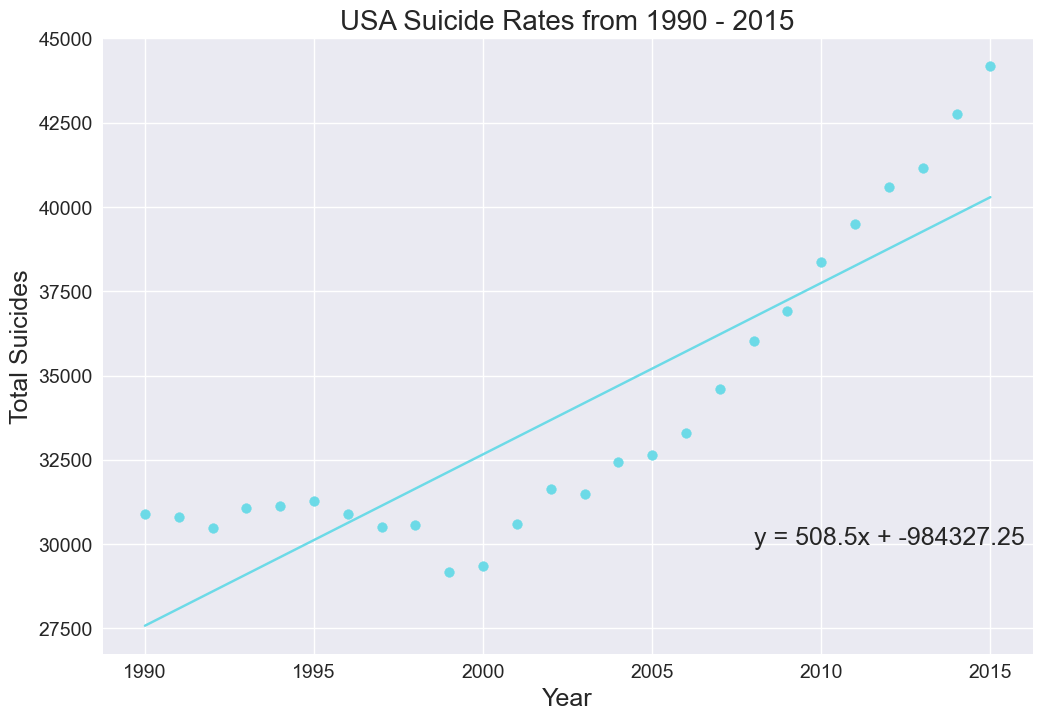

In [69]:
#Creating linear regression graph and line to determine if there is a correlation between years and total suicides.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(usa_df['Year'] ,usa_df['SuicidesNo'])
regression_values = usa_df['Year'] *slope + intercept
linreg_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #LinReg line
plt.plot(usa_df['Year'], regression_values)
plt.scatter(usa_df['Year'] ,usa_df['SuicidesNo'])
plt.annotate(linreg_eq, (2008,30000), fontsize=18)
plt.title('USA Suicide Rates from 1990 - 2015', fontsize= 20) #Adding title, labels, adjusting fontsize
plt.ylabel('Total Suicides', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [70]:
print(f'The correlation coefficient for the number of suicides per year in the United States is {np.round(rvalue, decimals = 2)}')
print(f'The linear regression model is y =  {np.round(slope, decimals =2)} x +  {np.round(intercept, decimals =2)}')

The correlation coefficient for the number of suicides per year in the United States is 0.87
The linear regression model is y =  508.5 x +  -984327.25


The above graph represents the total suicides in the USA from 1990 to 2015. The regression line and correlation coefficient of .87 represents a strong positive correlation between the years and the number of suicides. I used the linear regression model of y= 508.5x + - 984327.25 to predict the suicides for 2018 to see how accurate the results of our analysis were. The linear regression model predicts approximately 41,826 suicides in the USA in 2018, compared to the actual number reported of 48,344 (source: World Health Organization).Thus, our model underpredicted the number of suicides. Below is a link for the source.

https://suicidology.org/wp-content/uploads/2020/02/2018datapgsv2_Final.pdf

# Final Data Analysis

In conclusion, I observed several trends in global suicide rates across countries, gender, and age from the years 1990 to 2015. Below are a few of our findings per question:

1.) What are the global trends in suicide?
A noticeable insight is, after the peak in 1995, the rate of suicides continued to decline over the next 20 years from 1995 to 2015. I observed that the suicide rate is highest specifically in the continents of Europe, Asia, and Australia Oceania. In regards to individual countries, Lithuania had the highest average suicide rate per 100,000 individuals, and Russia had the highest total suicides.

2). Does gender play a role in suicide?
The data I used is classified according to the biological sex of a person. They have not accounted for gender expressions, nor have they included categories for expressions of sexuality. This may have affected our results since I was limited to gender based on biology. From what I observed, males have a higher rate of suicide compared to females globally and in the United States. I concluded the suicide rate of men is around 3-4 times that of women. This trend is apparent both in the rate as well as the total number of suicides.

3.) Which age group falls victim to suicide most frequently?
Each age group corresponded to a generational category. The GI generation are those who fought in The Great War, also known as World War I. They were followed by the Silent generation, those who were born after the war. Next are the Boomers, the generation born to the Silent generation after World War II. Then followed by the categories of Generation X, Millennials (also called Gen Y), and Generation Z, respectively.
Overall, I observed the suicide rates increased as age increased. Also, the group with the highest total number of suicides per 100,000 individuals were among the 75+ age group. Even though there were more suicides for the age group of 35-54 years (the Boomer generation), the age group 75+ (the GI generation) had the highest rate of suicides per 100,000 individuals.

4.) What are the suicide trends in the US?
Overall, as the years increased from 1990 to 2015, I observed the number of suicides increased over the same time period in the United States. I also looked deeper at the number of suicides between male and females in the United States by conducting an independent t-test to determine if there was a significant difference in the population means of gender. Based on our findings, there was a significant statistical difference between the average total suicides for men and women in the United States.

Overall, I learned a great deal about the trends in global suicide rates across numerous variables from 1990 to 2015. However, some additional topics I would have liked to explore if I had more time:
⚬T-Test - why is there a significant difference in the number of suicides between males and females in the USA?
⚬Human Development Index - there were several null values in the original source data; though this is a key metric when evaluating suicide.
⚬The relationship between GDP and suicide rates.
⚬The dataset gave us the "who" and "where." It would be interesting to explore more data that would help myself to understand more of the ... "why?"